# To predict the presence of Heart Disease in the patient

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("heartdisease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [3]:
df.shape

(200, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       200 non-null    int64 
 1   sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  200 non-null    object
 4   chol      200 non-null    object
 5   fbs       200 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   200 non-null    object
 8   exang     200 non-null    object
 9   oldpeak   200 non-null    object
 10  slope     200 non-null    object
 11  ca        200 non-null    object
 12  thal      200 non-null    object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [5]:
#checking null values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
#replacing the question mark with NaN
df=df.replace("?",np.nan)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0


In [8]:
#replacing the values 1,2,3,4 in num to  1  to detect heart disease presence
df['num'].replace(to_replace=[1,2,3,4],value="1",inplace=True)

In [9]:
df.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num         object
dtype: object

In [10]:
#replacing missing values
for col in ['trestbps','chol','fbs','thalach','exang','oldpeak','slope','ca','thal']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [12]:
df['chol']=df['chol'].astype(int)
df['fbs']=df['fbs'].astype(int)
df['trestbps']=df['trestbps'].astype(int)
df['thalach']=df['thalach'].astype(int)
df['exang']=df['exang'].astype(int)
df['oldpeak']=df['oldpeak'].astype(float)
df['slope']=df['slope'].astype(int)
df['thal']=df['thal'].astype(int)
df['ca']=df['ca'].astype(int)
df['num']=df['num'].astype(int)

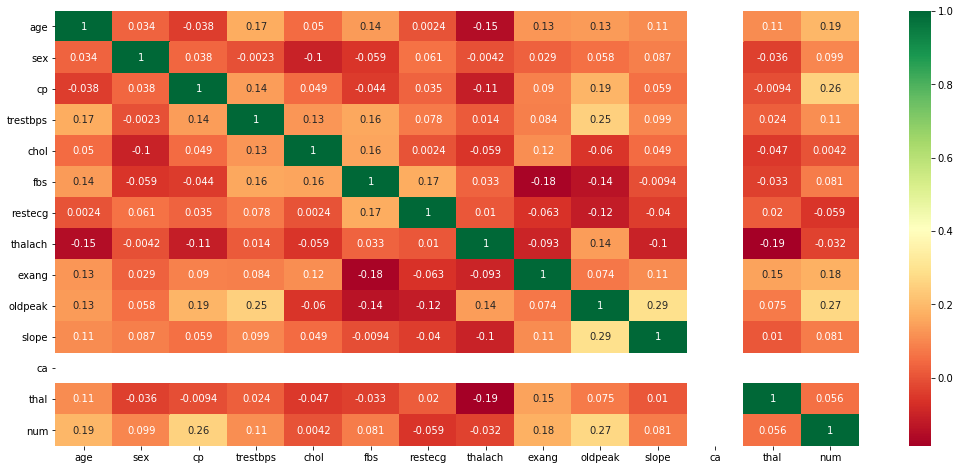

In [13]:
#checking correlation
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

here restecg is negatively correlated with num

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3.0,2,0,7,1
1,44,1,4,130,209,0,1,127,0,0.0,2,0,7,0
2,60,1,4,132,218,0,1,140,1,1.5,3,0,7,1
3,55,1,4,142,228,0,1,149,1,2.5,1,0,7,1
4,66,1,3,110,213,1,2,99,1,1.3,2,0,7,0


In [15]:
df.drop(columns=['restecg','chol'],axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       200 non-null    int64  
 1   sex       200 non-null    int64  
 2   cp        200 non-null    int64  
 3   trestbps  200 non-null    int32  
 4   fbs       200 non-null    int32  
 5   thalach   200 non-null    int32  
 6   exang     200 non-null    int32  
 7   oldpeak   200 non-null    float64
 8   slope     200 non-null    int32  
 9   ca        200 non-null    int32  
 10  thal      200 non-null    int32  
 11  num       200 non-null    int32  
dtypes: float64(1), int32(8), int64(3)
memory usage: 12.6 KB


In [17]:
df.describe()

,age,sex,cp,trestbps,fbs,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000
mean,59.350000,0.970000,3.505000,129.910000,0.340000,122.055000,0.740000,0.951000,2.065000,0.0,6.880000,0.745000
std,7.811697,0.171015,0.795701,19.280055,0.474898,18.876269,0.439735,1.110344,0.471046,0.0,0.589353,0.436955
min,35.000000,0.000000,1.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,112.000000,0.000000,0.000000,2.000000,0.0,7.000000,0.000000
50%,60.000000,1.000000,4.000000,123.000000,0.000000,120.000000,1.000000,0.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,140.000000,1.000000,130.000000,1.000000,2.000000,2.000000,0.0,7.000000,1.000000
max,77.000000,1.000000,4.000000,190.000000,1.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,1.000000


In [18]:
print(df.groupby('num').size())

num
0     51
1    149
dtype: int64


In [19]:
print(df.groupby('sex').size())   #1-male,0-female

sex
0      6
1    194
dtype: int64


In [20]:
#checking skewness
df.skew()

age        -0.404091
sex        -5.552105
cp         -1.648734
trestbps   -0.773003
fbs         0.680636
thalach     0.265689
exang      -1.102593
oldpeak     0.823429
slope       0.210521
ca          0.000000
thal       -5.920627
num        -1.132724
dtype: float64

most of the data value is less than 0.55 

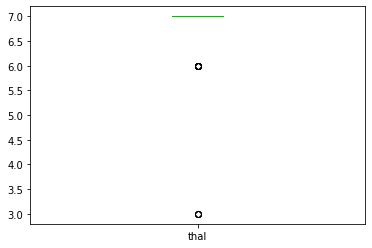

In [21]:
#checking outliers
df['thal'].plot.box()

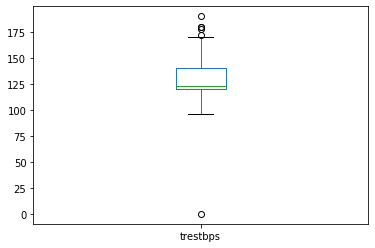

In [22]:
df['trestbps'].plot.box()

here in this column we are having outliers 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000365F404688>,
      dtype=object)

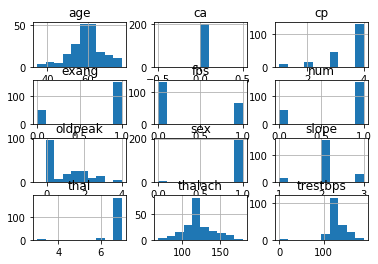

In [23]:
df.hist()

from above we can say ranges are different for different columns so there is a need of scaling

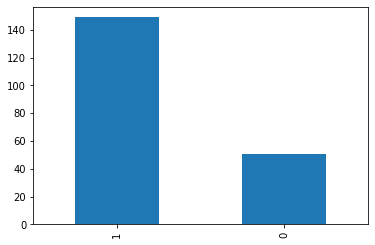

In [24]:
#EDA
df.num.value_counts().plot(kind="bar")

maximum people are having heart disease

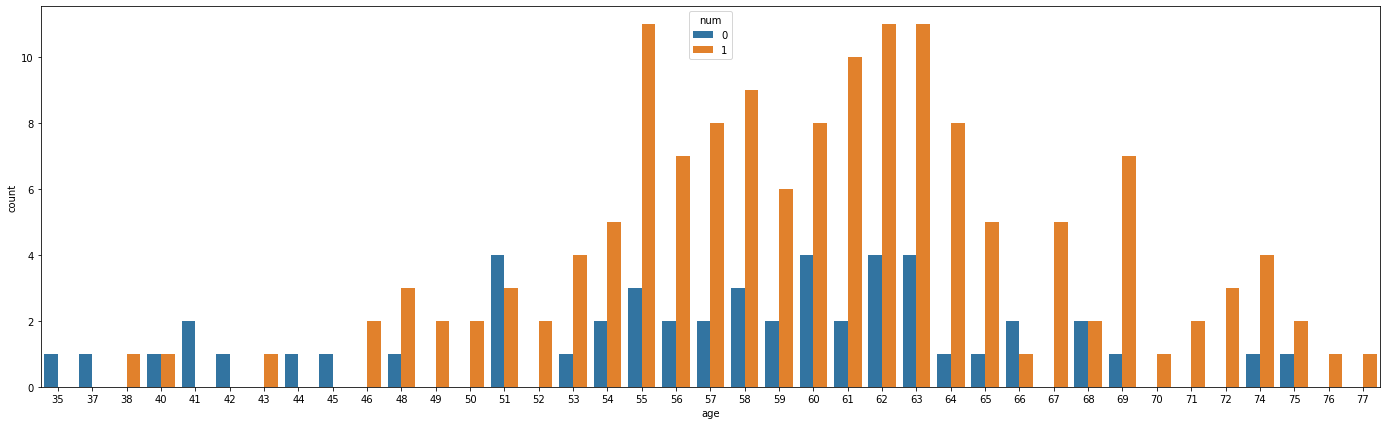

In [25]:
plt.figure(figsize=(24,7))
sns.countplot(x='age',data=df,hue='num')

from the age group of 54 to 64 ...heart disease is occuring more

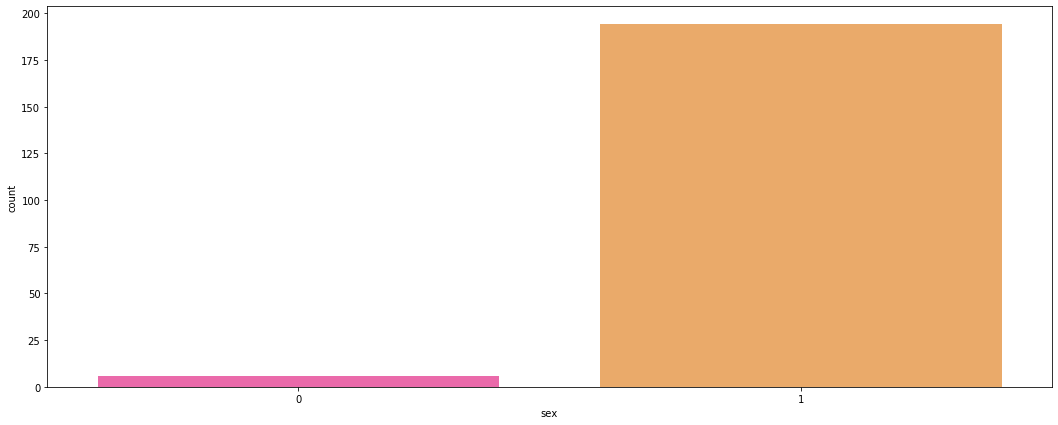

In [26]:
plt.figure(figsize=(18,7))
sns.countplot('sex',data=df,palette='spring')

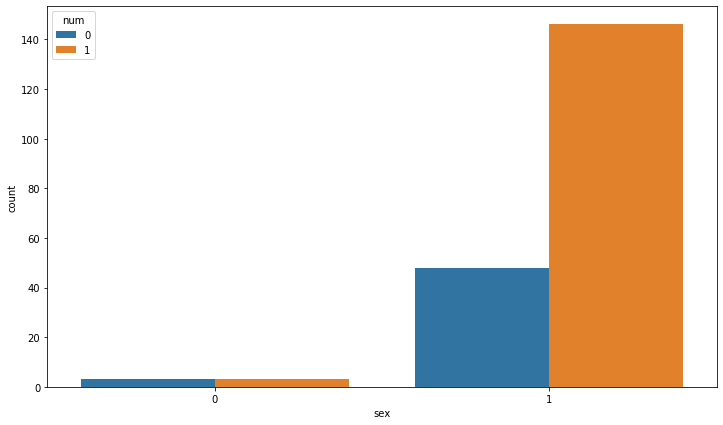

In [27]:
plt.figure(figsize=(12,7))
sns.countplot(x='sex',data=df,hue='num')

In females heart disease chances are 50-50 but in males heart disease occuring is more

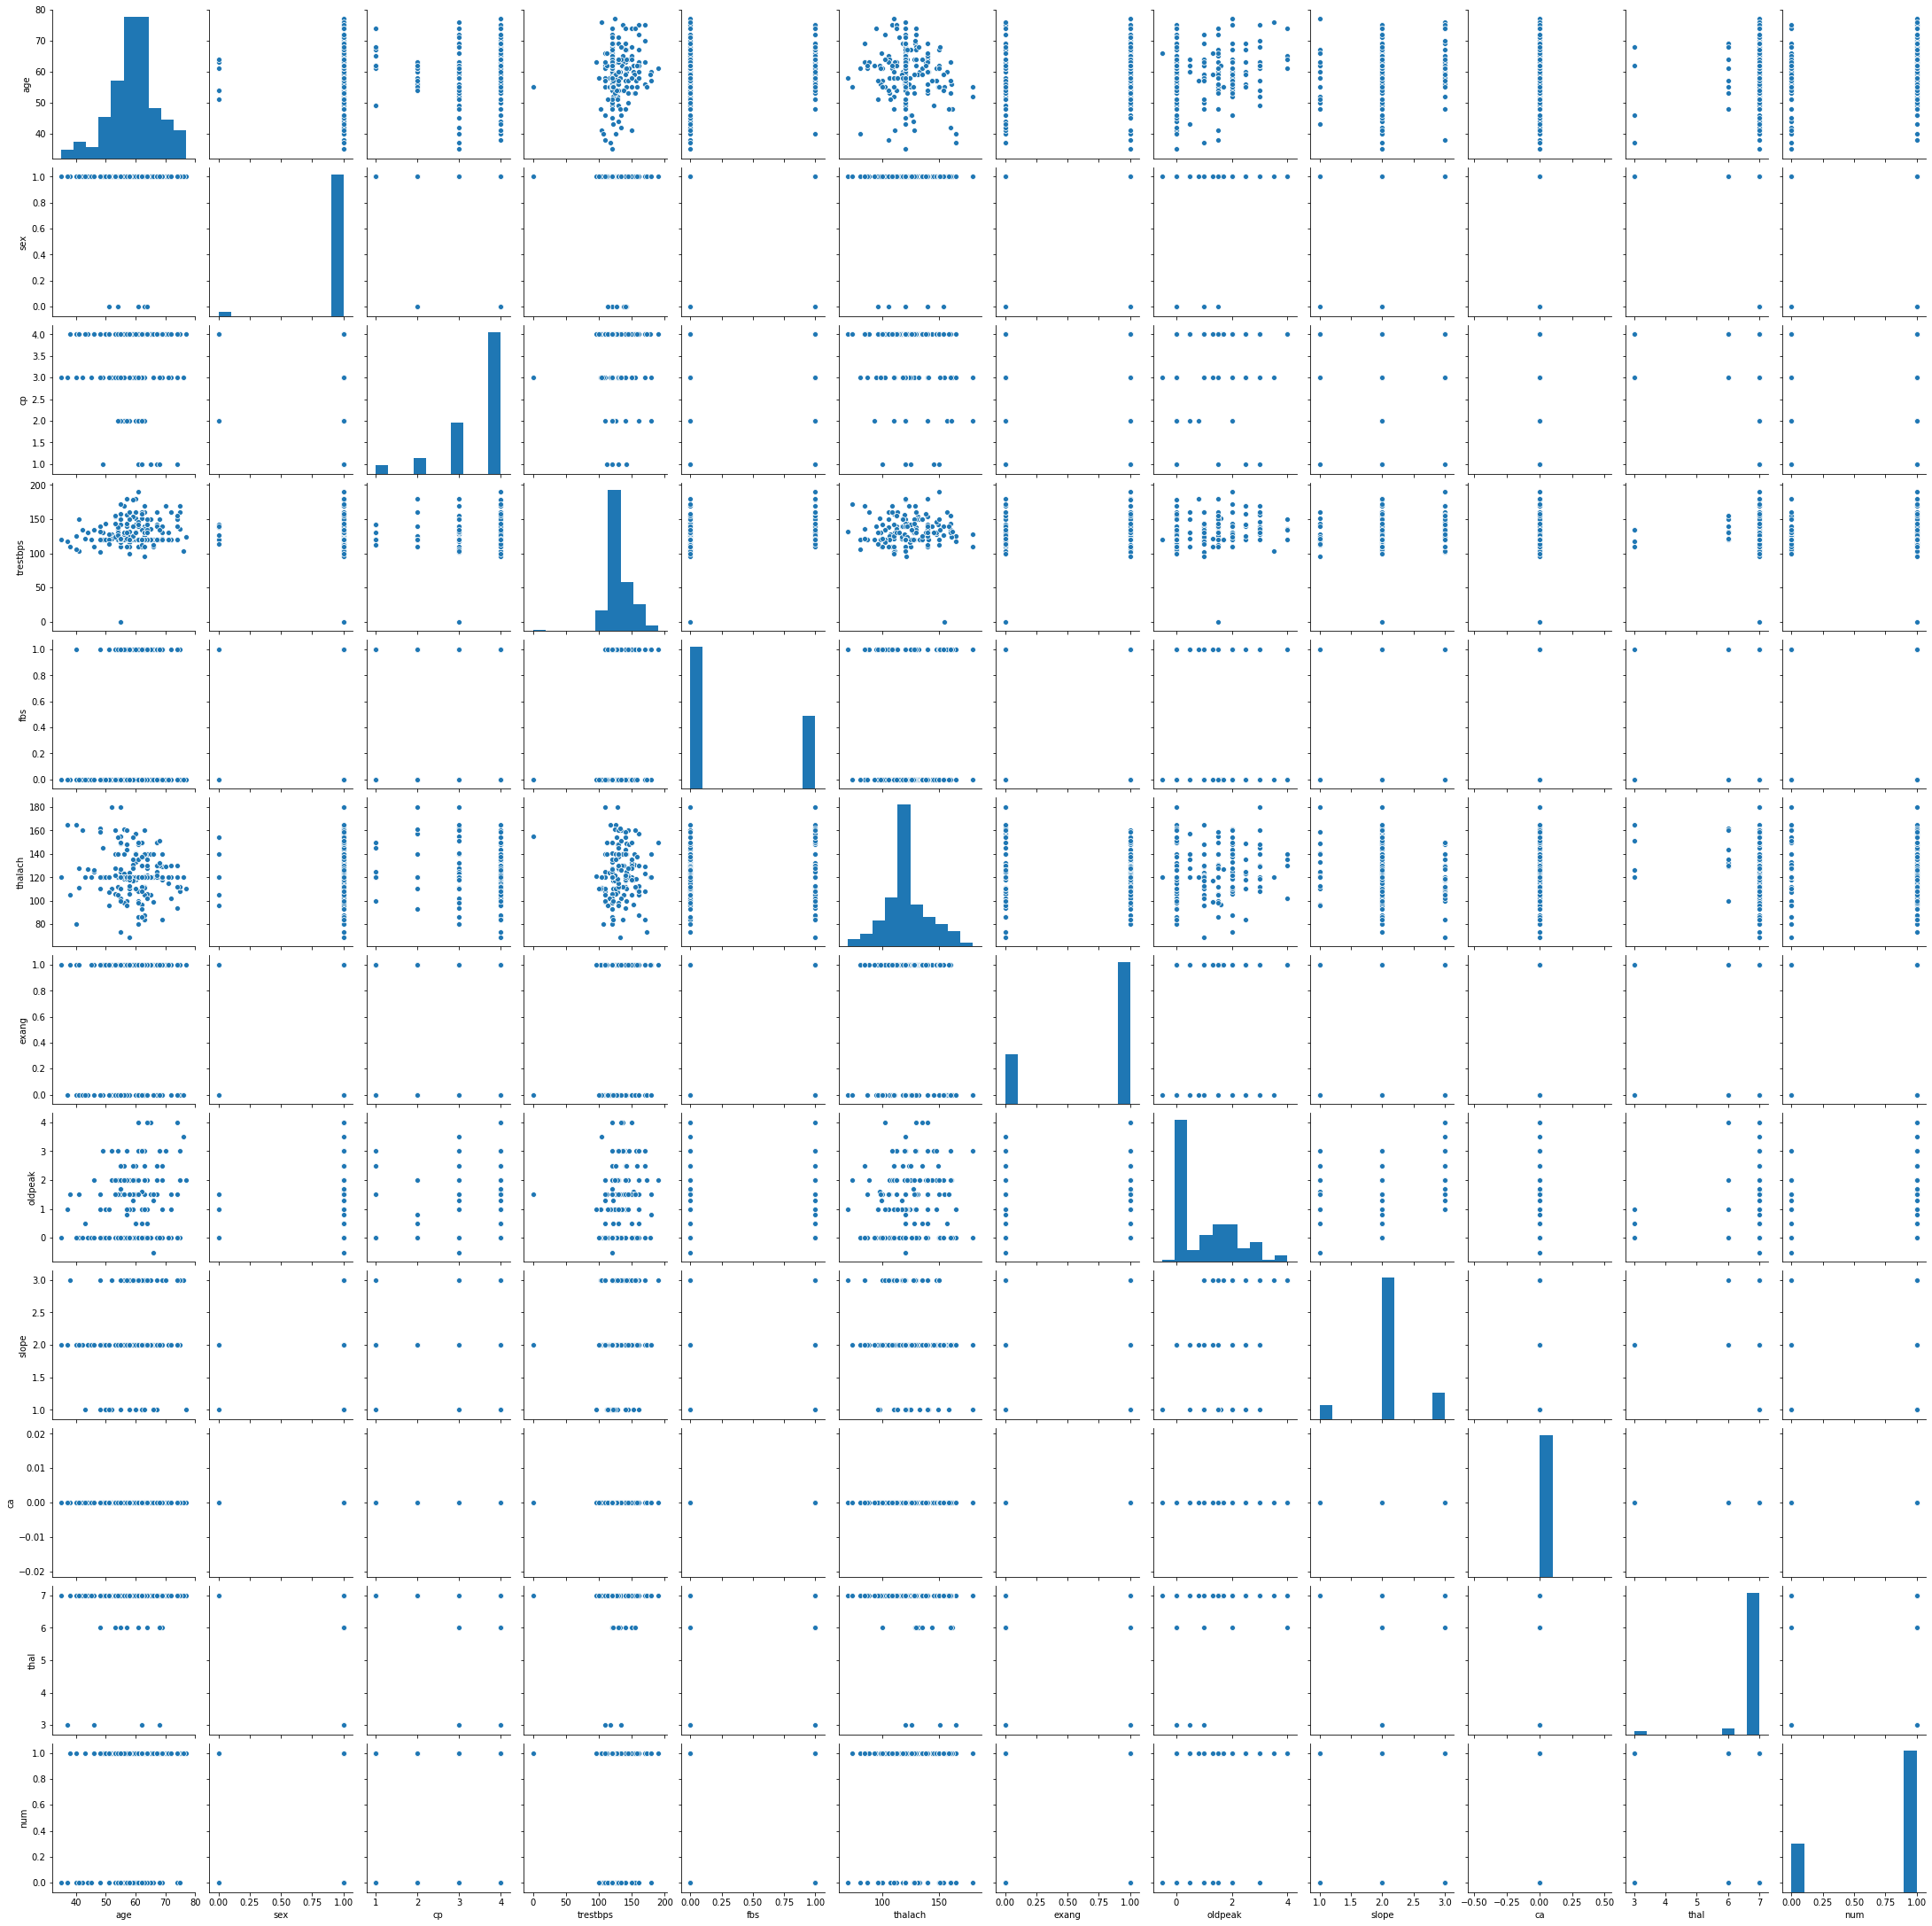

In [28]:
sns.pairplot(df)

In [29]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler


In [30]:
#lets split into input and target variables
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [31]:
#splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

In [32]:
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [33]:
#Logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_pred))
print('confusion_matrix',confusion_matrix(y_test,y_pred))
print('classification_report',classification_report(y_test,y_pred))

Accuracy score 0.875
confusion_matrix [[ 6  4]
 [ 1 29]]
classification_report               precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        30

    accuracy                           0.88        40
   macro avg       0.87      0.78      0.81        40
weighted avg       0.87      0.88      0.87        40



In [34]:
#cross validation
from sklearn.model_selection import cross_val_score
lgscores=cross_val_score(lg,x,y,cv=5)
print(lgscores)
print(lgscores.mean())

[0.775 0.875 0.8   0.775 0.7  ]
0.7849999999999999


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model=[LogisticRegression(), GaussianNB(),SVC(), DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.875
[[ 6  4]
 [ 1 29]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        30

    accuracy                           0.88        40
   macro avg       0.87      0.78      0.81        40
weighted avg       0.87      0.88      0.87        40



accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.85
[[ 6  4]
 [ 2 28]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.88      0.93      0.90        30

    accuracy                           0.85

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=99)
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy score: 0.8
[[ 7  3]
 [ 5 25]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.83      0.86        30

    accuracy                           0.80        40
   macro avg       0.74      0.77      0.75        40
weighted avg       0.82      0.80      0.81        40



In [37]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rfc,x,y,cv=10)
print(rfscores)
print(rfscores.mean())


[0.9  0.45 0.85 0.85 0.7  0.75 0.7  0.75 0.75 0.6 ]
0.7299999999999999


In [38]:
#hyper parameters
import numpy as np
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no. of feature consider at every split
max_features=['auto','sqrt']
# max. no. of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#max_depth.append(None)
#Minimum no. of samples required to split a node
min_sample_split=[2,5,10,15,100]
#minimum no. of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [39]:
# create the random grid
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_sample_split,
             'min_samples_leaf':min_samples_leaf
              }

In [40]:
rf_random=RandomizedSearchCV(estimator=rfc,param_distributions=random_grid,scoring='accuracy',n_iter=10,cv=10,verbose=2,random_state=42,n_jobs=1)

In [41]:
rf_random

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [42]:
rf_random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [43]:
predictions=rf_random.predict(x_test)

In [44]:
rf_random.best_score_

0.75

among all models logistic regression is giving high score and good cross validation score 

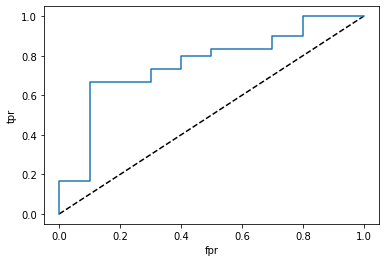

0.7666666666666667


In [50]:
#AUC ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()


auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

In [51]:
#saving a model
from sklearn.externals import joblib
joblib.dump(lg,'heartdisease.pkl')

['heartdisease.pkl']

In [52]:
df1=pd.DataFrame(y_pred)
df1.to_csv("heart_disease.csv")